In [3]:
#import modules
import pandas as pd
import numpy as np
import Bio
from Bio import Seq
from Bio import SeqIO
import torch
import matplotlib.pyplot as plt
import sys
from torch.utils.data import TensorDataset, DataLoader
import functions

In [7]:
#define data file paths for running on digs
thermo_path_digs = '/home/achazing/other/classes/data_science_class/ThermoDrift/data/uniprot-thermophilus.fasta'
psychro_path_digs = '/home/achazing/other/classes/data_science_class/ThermoDrift/data/uniprot-psychrophilus.fasta'
meso_path_digs = '/home/achazing/other/classes/data_science_class/ThermoDrift/data/uniprot-mesophilus.fasta'

In [4]:
#define data file paths for running locally/testing
thermo_path_local = '../../../data_sets/thermal_proteins/uniprot-thermophilus.fasta'
psychro_path_local = '../../../data_sets/thermal_proteins/uniprot-psychrophilus.fasta'
meso_path_local = '../../../data_sets/thermal_proteins/uniprot-mesophilus.fasta'

In [8]:
#run the fasta_to_classified_df function
df_thermo = functions.fasta_to_classified_df(thermo_path_digs,protein_class='Thermophillic',sample=True)
df_meso = functions.fasta_to_classified_df(meso_path_digs,protein_class='Mesophillic')
df_psychro = functions.fasta_to_classified_df(psychro_path_digs,protein_class='Psychrophillic')


20718
19386
23618


In [11]:
#run the combine_dfs function
list_dfs = [df_thermo,df_meso,df_psychro]
df_combine = functions.combine_dfs(list_dfs)

In [38]:
set(df_combine['class'])

{'Mesophillic', 'Psychrophillic', 'Thermophillic'}

In [20]:
seq_list = df_combine['sequence'].tolist()
length_list = [len(i) for i in seq_list]
df_combine['length'] = length_list

(0, 2000)

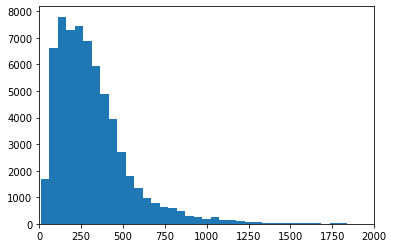

In [28]:
plt.hist(length_list,bins=200)
plt.xlim(0,2000)

In [39]:
thermo_df = df_combine[df_combine['class'] == 'Thermophillic']
thermo_seq_list = thermo_df['sequence'].tolist()
thermo_length_list = [len(i) for i in thermo_seq_list]

psychro_df = df_combine[df_combine['class'] == 'Psychrophillic']
psychro_seq_list = psychro_df['sequence'].tolist()
psychro_length_list = [len(i) for i in psychro_seq_list]

meso_df = df_combine[df_combine['class'] == 'Mesophillic']
meso_seq_list = meso_df['sequence'].tolist()
meso_length_list = [len(i) for i in meso_seq_list]

(0, 2000)

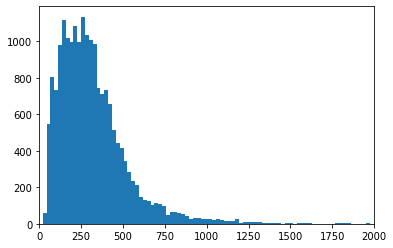

In [40]:
plt.hist(meso_length_list,bins=200)
plt.xlim(0,2000)

(0, 2000)

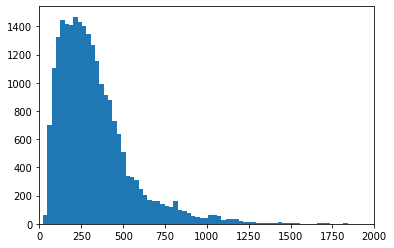

In [41]:
plt.hist(psychro_length_list,bins=200)
plt.xlim(0,2000)

(0, 2000)

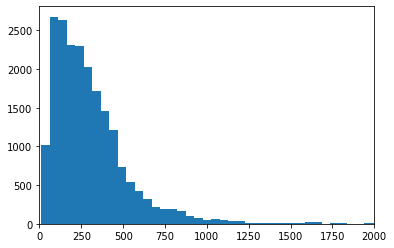

In [42]:
plt.hist(thermo_length_list,bins=200)
plt.xlim(0,2000)

In [15]:
#run the filter_seqs function
df_filter = functions.filter_seqs(df_combine)

NameError: name 'df_combine' is not defined

In [13]:
#define lists of filtered sequences and classes
seq_list = df_filter['sequence'].tolist()
class_list = df_filter['class'].tolist()

NameError: name 'df_filter' is not defined

In [9]:
#run the seq1hot function
X_data = functions.seq1hot(seq_list)

Just made new tensor X_data


KeyboardInterrupt: 

In [10]:
#run the class1hot function
y_data = functions.class1hot(class_list)

Just made new tensor y_data
<class 'torch.Tensor'>
torch.Size([59494, 3])


In [11]:
#run the save_tensor function
functions.save_tensor(X_data,'test_x.pt')
funstions.save_tensor(y_data,'test_y.pt')

NameError: name 'X_data' is not defined

/bin/bash: /usr/bin/conda: No such file or directory

Note: you may need to restart the kernel to use updated packages.


In [47]:
tensor_y = torch.load('../tensors/tensor_y.pt')

RuntimeError: ../tensors/tensor_y.pt is a zip archive (did you mean to use torch.jit.load()?)